In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [45]:
data_path = '../data/cleandata/train.csv'
df = pd.read_csv(data_path)
df.head(5)

,ID,YearBuilt,SqFt,Story,Acres,Baths,Fireplaces,Zip,Value
0,1,1990,2102,1.0,0.77,2.0,1,27603,203200
1,2,1986,1740,1.5,0.06,3.0,1,27604,119096
2,3,1955,795,1.0,0.30,1.0,0,27610,71666
3,4,1983,1152,1.0,0.68,2.0,0,27616,131103
4,6,1924,1829,1.5,0.25,3.0,1,27607,496425


In [46]:
## group by Zip
df_grouped = df.groupby('Zip')
df_grouped = df_grouped['Value'].mean()
df_grouped = df_grouped.sort_values(ascending=False)
X = df_grouped.values.reshape(-1,1)

In [47]:
## Kmeans clustering
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

def cluster_loss(X, kmeans):
    loss = 0
    ## intra-cluster loss
    for i in range(len(X)):
        loss += (X[i] - kmeans.cluster_centers_[kmeans.labels_[i]])**2
    return loss

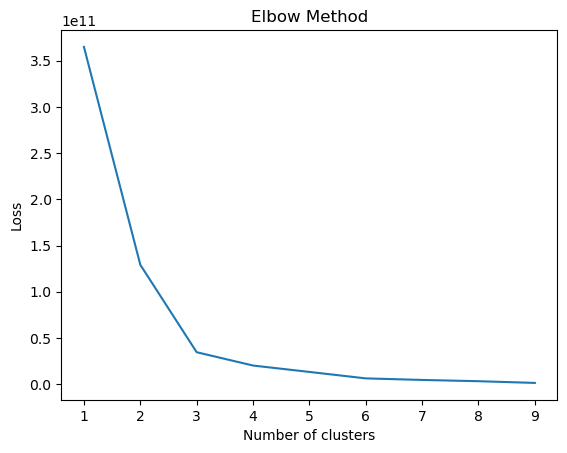

In [48]:
n_clusters = range(1, 10)
losses = []
for n in n_clusters:
    kmeans = KMeans(n_clusters=n, random_state=0).fit(X)
    losses.append(cluster_loss(X, kmeans))

plt.plot(n_clusters, losses)
plt.xlabel('Number of clusters')
plt.ylabel('Loss')
plt.title('Elbow Method')
plt.show()

### Select `K=3` clusters

In [51]:
K = 3
kmeans = KMeans(n_clusters=K, random_state=0).fit(X)
kmeans.labels_
Zip_code2Group = {df_grouped.index[i]: kmeans.labels_[i] for i in range(len(df_grouped))}
Zip_code2Group

{27608: 1,
 27519: 1,
 27614: 1,
 27518: 1,
 27607: 0,
 27526: 0,
 27615: 0,
 27613: 0,
 27617: 0,
 27612: 0,
 27513: 0,
 27609: 0,
 27539: 0,
 27511: 0,
 27606: 0,
 27603: 2,
 27604: 2,
 27502: 2,
 27605: 2,
 27616: 2,
 27560: 2,
 27545: 2,
 27529: 2,
 27562: 2,
 27610: 2,
 27601: 2}

In [52]:
## Append one-hot encoding to the original dataframe
df['Zip_cluster'] = df['Zip'].apply(lambda x: Zip_code2Group[x])
df = pd.get_dummies(df, columns=['Zip_cluster'])
df.head(5)

,ID,YearBuilt,SqFt,Story,Acres,Baths,Fireplaces,Zip,Value,Zip_cluster_0,Zip_cluster_1,Zip_cluster_2
0,1,1990,2102,1.0,0.77,2.0,1,27603,203200,False,False,True
1,2,1986,1740,1.5,0.06,3.0,1,27604,119096,False,False,True
2,3,1955,795,1.0,0.30,1.0,0,27610,71666,False,False,True
3,4,1983,1152,1.0,0.68,2.0,0,27616,131103,False,False,True
4,6,1924,1829,1.5,0.25,3.0,1,27607,496425,True,False,False


In [53]:
## drop 
df_out = df.drop(columns=['Zip', 'Zip_cluster_2'])
df_out.to_csv('../data/cleandata/train_Zip_onehot.csv', index=False)
df_out.head(5)

,ID,YearBuilt,SqFt,Story,Acres,Baths,Fireplaces,Value,Zip_cluster_0,Zip_cluster_1
0,1,1990,2102,1.0,0.77,2.0,1,203200,False,False
1,2,1986,1740,1.5,0.06,3.0,1,119096,False,False
2,3,1955,795,1.0,0.30,1.0,0,71666,False,False
3,4,1983,1152,1.0,0.68,2.0,0,131103,False,False
4,6,1924,1829,1.5,0.25,3.0,1,496425,True,False


# Transform Test Data

In [65]:
test = pd.read_csv('../data/rawdata/test.csv')

In [66]:
test['Zip_cluster'] = test['ZIP'].apply(lambda x: Zip_code2Group[x] if x in Zip_code2Group else 3)
test

,ID,YearBuilt,SqFt,Story,Acres,Baths,Fireplaces,ZIP,Zip_cluster
0,1,1967,1752,1.00,0.29,1.5,1,27604,2
1,2,1987,2678,1.75,0.17,3.0,1,27613,0
2,3,1986,1024,2.00,0.03,1.5,0,27616,2
3,4,1963,2340,1.00,0.56,2.5,1,27610,2
4,5,1995,1104,1.00,0.51,2.0,1,27545,2
5,6,1947,900,1.00,0.25,1.0,0,27607,0
6,7,1990,1890,2.00,0.18,2.5,1,27513,0
7,8,1985,1056,1.00,0.18,2.0,0,27529,2
8,9,1984,1550,2.00,0.04,2.5,1,27612,0
9,10,1967,1420,1.00,0.26,2.0,1,27610,2


In [67]:
test = pd.get_dummies(test, columns=['Zip_cluster'])
test = test.drop(columns=['ZIP'])
test = test.drop(columns=['Zip_cluster_2'])
if 'Zip_cluster_1' not in test.columns:
    test['Zip_cluster_1'] = False


In [68]:
test

,ID,YearBuilt,SqFt,Story,Acres,Baths,Fireplaces,Zip_cluster_0,Zip_cluster_1
0,1,1967,1752,1.00,0.29,1.5,1,False,False
1,2,1987,2678,1.75,0.17,3.0,1,True,False
2,3,1986,1024,2.00,0.03,1.5,0,False,False
3,4,1963,2340,1.00,0.56,2.5,1,False,False
4,5,1995,1104,1.00,0.51,2.0,1,False,False
5,6,1947,900,1.00,0.25,1.0,0,True,False
6,7,1990,1890,2.00,0.18,2.5,1,True,False
7,8,1985,1056,1.00,0.18,2.0,0,False,False
8,9,1984,1550,2.00,0.04,2.5,1,True,False
9,10,1967,1420,1.00,0.26,2.0,1,False,False


In [69]:
## save to csv
test.to_csv('../data/cleandata/test_Zip_onehot.csv', index=False)